In [1]:
import networkx as nx
import random
from hollow import *
from fib import *
import numpy as np
import heapq
def DijkstraTest():
    import time
    
    G = nx.gnp_random_graph(100, 2 * np.log(n)/n , seed=0, directed=True)
    for (u, v) in G.edges():
        G.edges[u, v]['weight'] = random.random()
    u = random.randint(0, 99)
    v = random.randint(0, 99)

    heap = HollowHeap()
    h = []
    heapq.heappush(h, (u, 0))
    
    distances = {}
    distances[u] = 0
    
    adj = dict(G.adjacency())
    
    t = time.process_time()
    
    while h != None:
        n = h[0][0]
        d = h[0][1]
        if n == v:
            print("found v with distance", d)
            break
        heapq.heappop(h)
        
        #edges = list(G.edges(n))
        for e in adj[n].keys():
            newd = d + adj[n][e]['weight']
            if e not in distances or newd < distances[e]:
                distances[e] = newd
                #h = heap.insert(e[1], newd, h)
                heapq.heappush(h, (e, newd))
    t1 = time.process_time()
    return t1 - t

In [2]:
import networkx as nx
import random
from hollow import *
from fib import *
import heapq
def DijkstraTestHollow(a):
    import time
    
    G = nx.gnp_random_graph(a, np.log(a)/a , seed=0, directed=True)
    for (u, v) in G.edges():
        G.edges[u, v]['weight'] = random.random()
        
    times = 0
    for j in range(5):
        u = random.randint(0, a - 1)
        v = random.randint(0, a - 1)

        heap = HollowHeap()
        h = None
        #heapq.heappush(h, (u, 0))
        h = heap.insert(u, 0, h)

        distances = {}
        distances[u] = 0

        adj = dict(G.adjacency())
        t = time.process_time()

        while h != None:
            n = h.key
            d = h.value
            if n == v:
                break
            #heapq.heappop(h)
            h = heap.deleteMin(h)

            #edges = list(G.edges(n))
            for e in adj[n].keys():
                newd = d + adj[n][e]['weight']
                if e in distances and newd < distances[e]:
                    h = heap.decKey(e, newd, h)
                if e not in distances:
                    distances[e] = newd
                    #heapq.heappush(h, (e, newd))
                    h = heap.insert(e, newd, h)


        t1 = time.process_time()
        times += t1 - t
    return times / 5

In [3]:
import networkx as nx
import random
from hollow import *
from fib import *
import heapq
def DijkstraTestFib(a):
    
    import time
    
    G = nx.gnp_random_graph(a, np.log(a)/a , seed=0, directed=True)
    for (u, v) in G.edges():
        G.edges[u, v]['weight'] = random.random()
        
    times = 0
    
    for j in range(5):
        u = random.randint(0, a - 1)
        v = random.randint(0, a - 1)

        heap = FibonacciHeap()
        h = heap.insert(0)
        distancestonodes = {}
        distancestonodes[0] = h
        h.value = u

        distances = {}
        distances[u] = 0

        adj = dict(G.adjacency())
        t = time.process_time()

        while heap.min != None:
            d = heap.min.key
            n = distancestonodes[d].value
            if n == v:
                break
            heap.extract_minimum()

            for e in adj[n].keys():
                newd = d + adj[n][e]['weight']
                if e in distances and newd < distances[e]:
                    heap.decrease_key(distancestonodes[distances[e]], newd)
                    distancestonodes[newd] = distancestonodes[distances[e]]
                if e not in distances:
                    distances[e] = newd
                    h = heap.insert(newd)
                    distancestonodes[newd] = h
                    h.value = e


        t1 = time.process_time()
        times += t1 - t
    return times / 5

In [4]:
import networkx as nx
import random
from hollow import *
from binom import *
import heapq
def DijkstraTestBinom(a):
    
    import time
    
    G = nx.gnp_random_graph(a, np.log(a)/a , seed=0, directed=True)
    for (u, v) in G.edges():
        G.edges[u, v]['weight'] = random.random()
        
    times = 0
    
    for j in range(5):
        u = random.randint(0, a - 1)
        v = random.randint(0, a - 1)

        heap = BinomialHeap()
        h = heap.insert(0)
        distancestonodes = {}
        distancestonodes[0] = h
        h.value = u

        distances = {}
        distances[u] = 0

        adj = dict(G.adjacency())
        t = time.process_time()

        while heap.get_min() != None:
            d = heap.get_min()
            n = distancestonodes[d].value
            if n == v:
                break
            heap.del_min()

            for e in adj[n].keys():
                newd = d + adj[n][e]['weight']
                if e in distances and newd < distances[e]:
                    heap.dec_key(distancestonodes[distances[e]], newd)
                    distancestonodes[newd] = distancestonodes[distances[e]]
                if e not in distances:
                    distances[e] = newd
                    h = heap.insert(newd)
                    distancestonodes[newd] = h
                    h.value = e


        t1 = time.process_time()
        times += t1 - t
    return times / 5

In [5]:
DijkstraTestHollow(100)

0.0005846669999999499

In [6]:
DijkstraTestFib(50)

0.00039848439999996544

In [7]:
DijkstraTestBinom(100)

0.00098228580000006

0
100
200
300
400
500
600
700
800
900


Text(0, 0.5, 'Runtime (s)')

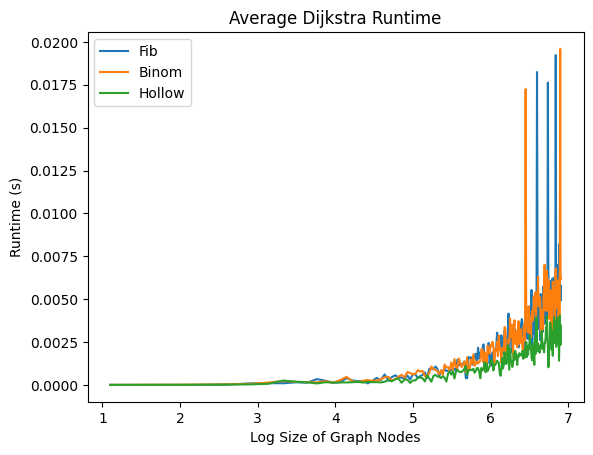

In [9]:
import matplotlib.pyplot as plt
import numpy as np
x = []
fib = []
hollow = []
binom = []

for i in range(0, 1000, 5):
    if i % 100 == 0:
        print(i)
    n = i + 3
    x.append(np.log(n))
    #print("testing fib")
    fib.append(DijkstraTestFib(n))
    #print("testing hollow")
    hollow.append(DijkstraTestHollow(n))
    #print("testing binom")
    binom.append(DijkstraTestBinom(n))
    
plt.plot(x,\
         fib, label='Fib')
plt.plot(x,\
         binom, label='Binom')

plt.title('Average Dijkstra Runtime')
plt.plot(x,\
         hollow, label='Hollow')

plt.legend()
plt.xlabel('Log Size of Graph Nodes')
plt.ylabel('Runtime (s)')